In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
sift_file = "../../output/5_11/sift.xlsx"  # 请确保文件路径正确
deep1B_file = "../../output/5_11/deep1B.xlsx"

sift_df = pd.read_excel(sift_file, sheet_name=None)
deep1B_df = pd.read_excel(deep1B_file, sheet_name=None)

# 获取第一张表的数据
sift_data = sift_df[list(sift_df.keys())[0]]
deep1B_data = deep1B_df[list(deep1B_df.keys())[0]]

# 处理数据格式，去掉 "ms" 并转换为浮点数
def clean_data(df):
    df_cleaned = df.copy()
    for col in df.columns[1:]:  # 跳过第一列 Method
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace("ms", "", regex=False).astype(float)
    return df_cleaned

sift_cleaned = clean_data(sift_data)
deep1B_cleaned = clean_data(deep1B_data)

# 提取 X 轴（query scale）和运行时间数据
query_scales = sift_cleaned.columns[1:].astype(str)  # 第一列是方法名，后面的列是 query scale

from matplotlib import rcParams
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]
rcParams["font.size"] = 16

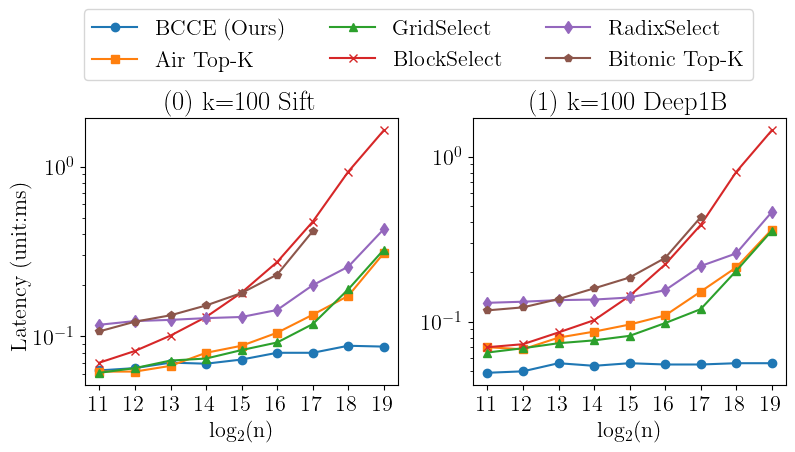

In [8]:
# 画图
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
methods = ["BCCE (Ours)", "Air Top-K", "GridSelect", "BlockSelect", "RadixSelect", "Bitonic Top-K"]

markers = ["o", "s", "^", "x", "d", "p"]
# fig.subplots_adjust(wspace=0.1)

for i, (data, title) in enumerate(zip([sift_cleaned, deep1B_cleaned], ["Sift", "Deep1B"])):
    ax = axs[i]
    for idx, row in data.iterrows():
        method = row.iloc[0]  # 方法名称
        times = row.iloc[1:].astype(float)  # 运行时间数据
        ax.plot(query_scales, times, marker=markers[idx], linestyle='-', label=methods[idx])

    ax.set_xlabel('log$_2$(n)')
    ax.set_yscale("log")
    ax.set_title(f"({i}) k=100 {title}")

handles, labels = ax.get_legend_handles_labels()
legend_properties = {'weight':'bold'}
legend = fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.143, 1.07, 0.8, 0.1), prop=legend_properties)
legend.get_texts()[0].set_weight("bold")
fig.text(0.0, 0.5, "Latency (unit:ms)", va='center', rotation='vertical')


plt.tight_layout()
plt.savefig("5_8.pdf", bbox_inches="tight")
plt.show()
plt.close()
